In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = pd.get_dummies(data=df, prefix=['species'], columns=['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
X = df.drop(['species_setosa', 'species_versicolor', 'species_virginica'],
            axis=1)
Y = df[['species_setosa', 'species_versicolor', 'species_virginica']]

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                Y,
                                                test_size=0.33,
                                                random_state=42)

# post pruning

In [8]:
treeModel = DecisionTreeClassifier(max_depth=2)  #max_depth=2

In [9]:
treeModel.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal_length <= 2.45\ngini = 0.444\nsamples = 100\nvalue = [[69, 31]\n[65, 35]\n[66, 34]]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [[0, 31]\n[31, 0]\n[31, 0]]'),
 Text(0.6, 0.5, 'petal_width <= 1.75\ngini = 0.333\nsamples = 69\nvalue = [[69, 0]\n[34, 35]\n[35, 34]]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.126\nsamples = 38\nvalue = [[38, 0]\n[4, 34]\n[34, 4]]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.042\nsamples = 31\nvalue = [[31, 0]\n[30, 1]\n[1, 30]]')]

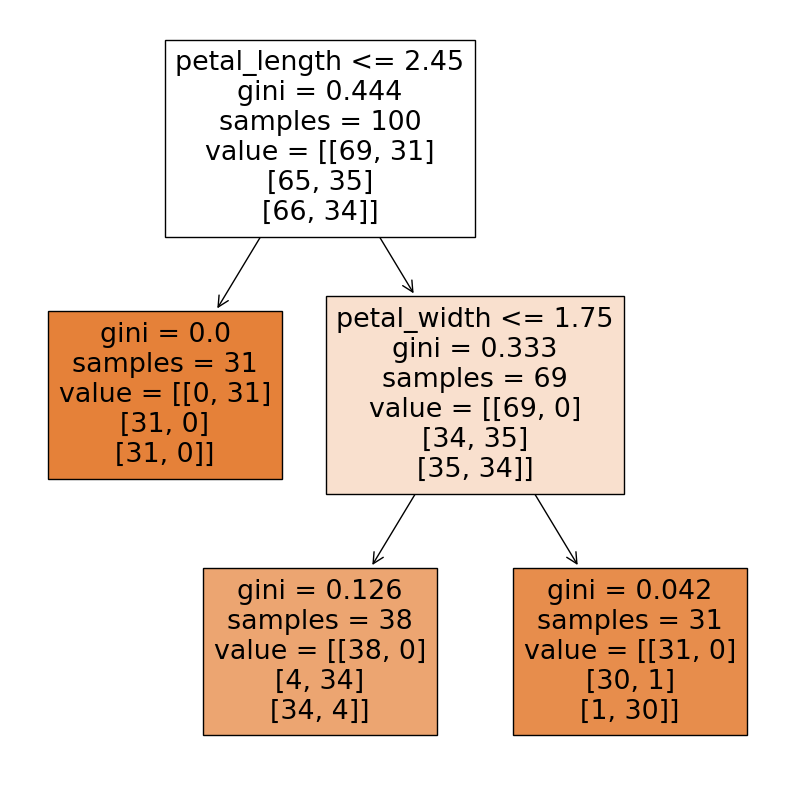

In [11]:
plt.figure(figsize=(10, 10))
tree.plot_tree(treeModel, filled=True, feature_names=X.columns)

In [15]:
pred = treeModel.predict(xtest)

In [16]:
#pred

In [17]:
score=accuracy_score(pred,ytest)
print(score)

0.98


In [18]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 samples avg       0.98      0.98      0.98        50



# Preprunning

In [20]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [21]:
cv = GridSearchCV(treeModel, param_grid=parameter, cv=5, scoring='accuracy')

In [23]:
cv.fit(xtrain, ytrain)

/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/mridul/VenvW/DAML/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
#বেস্ট প্যারামিটার বের করার জন্য
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [25]:
pred2=cv.predict(xtest)

In [26]:
score2 = accuracy_score(pred2,ytest)

In [27]:
score2

0.96

In [28]:
print(classification_report(pred2, ytest))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.88      0.94        17
           2       0.94      1.00      0.97        15

   micro avg       0.96      0.96      0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50
 samples avg       0.96      0.96      0.96        50

